In [1]:
import TensorC.coclustering.tensorCoclusteringPoisson as tcCoP
import TensorC.coclustering.tensorCoclusteringBernoulli as tcCoB
import TensorC.coclustering.tensorCoclusteringGaussian as tcCoG
import TensorC.coclustering.sparseTensorCoclustering as tcSCoP
from TensorC.vizualisation import plot_logLikelihood_evolution
from TensorC.vizualisation import plot_parameter_evolution
from TensorC.vizualisation import plot_slice_reorganisation
from TensorC.reader import load
import TensorC.decomposition.decomposition_with_clustering as decomposition 

# Tensorly and TensorD package must be installed

from  tensorly.decomposition import parafac
from  tensorly.decomposition import tucker

"""
from tensorD.factorization.env import Environment
from tensorD.dataproc.provider import Provider
from tensorD.factorization.cp import CP_ALS
import tensorD.demo.DataGenerator as dg
from tensorD.factorization.tucker import HOOI
from tensorD.factorization.ncp import NCP_BCU
from tensorD.factorization.ntucker import NTUCKER_BCU
"""

import numpy as np
import pandas as pd 


from coclust.evaluation.external import accuracy
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score


/home/boutalbi/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


# Load DBLP1 dataset   

In [2]:
data_v2, labels, slices = load.load_dataset("DBLP1_dataset")
n = data_v2.shape[0]
d = data_v2.shape[1]
v = data_v2.shape[2]

base_dir /home/boutalbi/PycharmProjects/TensorC/TensorC/reader


# Execute TSPLBM on the dataset   

In [7]:
# Define the number of clusters K 
K = 3

# Optional: initialization of rows and columns partitions
z=np.zeros((n,K))
z_a=np.random.randint(K,size=n)
z=np.zeros((n,K))+ 1.e-9
z[np.arange(n) , z_a]=1 
                
w=np.asarray(z)


# Run TSPLBM  

model = tcSCoP.SparseTensorCoclusteringPoisson(n_clusters=K ,  fuzzy = True,init_row=z, init_col=w,max_iter=50)
model.fit(data_v2)


predicted_row_labels = model.row_labels_
predicted_column_labels = model.column_labels_

acc = np.around(accuracy(labels, predicted_row_labels),3)
print("Accuracy : ", acc)

les gammakl_hat [[[2.94907393e-05 2.41100012e-06 1.66245578e-04 1.15680678e-03]
  [1.79232739e-05 2.06929876e-06 5.09632118e-05 1.26556999e-03]
  [1.79232739e-05 2.06929876e-06 5.09632118e-05 1.26556999e-03]]

 [[1.79232739e-05 2.06929876e-06 5.09632118e-05 1.26556999e-03]
  [3.07712770e-05 2.42325443e-06 1.64242870e-04 1.29198966e-03]
  [1.79232739e-05 2.06929876e-06 5.09632118e-05 1.26556999e-03]]

 [[1.79232739e-05 2.06929876e-06 5.09632118e-05 1.26556999e-03]
  [1.79232739e-05 2.06929876e-06 5.09632118e-05 1.26556999e-03]
  [2.90989659e-05 2.44587992e-06 1.62289786e-04 1.17111256e-03]]]
proportion lignes [0.32777488 0.33402814 0.33819698]
proportion colonnes [0.32777488 0.33402814 0.33819698]
objective function -7071296.183608606
iteration n:  0
fc value -7053115.012295702
fc value -7053115.012295702
iteration n:  1
fc value -6964806.062502219
fc value -6964806.062502219
iteration n:  2
fc value -6939542.037986537
fc value -6939542.037986537
iteration n:  3
fc value -6935960.195939

/home/boutalbi/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


# Factorization and clustering 

In [8]:
# Test Tucker using Tensorly

#error , res_Parafac= parafac(data_v2, 10,init='random', tol=10e-6)
factor , res_tucker= tucker(data_v2, 10,init='random', tol=10e-6)

##################################################################
# Test Tucker using TensorD
"""
data_provider = Provider()
data_provider.full_tensor = lambda: data_v2
env = Environment(data_provider, summary_path='/tmp/ntucker_demo')
ntucker = NTUCKER_BCU(env)
args = NTUCKER_BCU.NTUCKER_Args(ranks=[10, 10, 10], validation_internal=10)
ntucker.build_model(args)
print("ntucker", type(ntucker))
ntucker.train(2000)
factor = ntucker.factors
"""
##################################################################
# Test decomposition with clustering 
listAlgorithmes =["Kmeans++", "Skmeans","SpectralClustering","GMM"]
for a,algo in enumerate(listAlgorithmes):
    model_decompClustering = decomposition.DecompositionWithClustering(n_clusters = [3,3,2], modes = [1,2,3], algorithm = algo)
    model_decompClustering.fit(res_tucker)

    all_clustering = model_decompClustering.labels_

    mode1_clustering = all_clustering[0] 
    acc = np.around(accuracy(labels, mode1_clustering),3)
    print("Accuracy decompostion with "+ algo + " : ", acc)

/home/boutalbi/anaconda3/lib/python3.7/site-packages/tensorly/decomposition/_tucker.py:60: Warning: Given only one int for 'rank' intead of a list of 3 modes. Using this rank for all modes.
  warnings.warn(message, Warning)


modes  [1, 2, 3]
Accuracy decompostion with Kmeans++ :  0.385
modes  [1, 2, 3]
 == New init == 
iteration: 0
564.8616519254472
iteration: 1
877.1812568966561
iteration: 2
902.2936430408466
iteration: 3
918.626980951206
iteration: 4
931.6341276185838
iteration: 5
938.0669629105467
iteration: 6
941.85273555424
iteration: 7
943.670055380316
iteration: 8
944.613849076161
iteration: 9


/home/boutalbi/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


945.1246699898429
iteration: 10
945.5639512844451
iteration: 11
945.8275697079466
iteration: 12
945.9730083061608
iteration: 13
946.0685450525921
iteration: 14
946.1939199130059
iteration: 15
946.2224992297038
iteration: 16
946.2257849153357
iteration: 17
946.2286945697879
iteration: 18
 == New init == 
iteration: 0
526.4653200011475
iteration: 1
892.2621029413413
iteration: 2
912.7815435353343
iteration: 3
927.6627094820608
iteration: 4
938.9645869052318
iteration: 5
945.2561452305159
iteration: 6
948.8466739989236
iteration: 7
951.491646373683
iteration: 8
953.2186275658532
iteration: 9
954.7697100885944
iteration: 10
955.5622725822418
iteration: 11
956.4680281324705
iteration: 12
956.9282625134182
iteration: 13
957.0587229305152
iteration: 14
957.1114331168291
iteration: 15
957.2429961224553
iteration: 16
957.3350068118384
iteration: 17
957.5350548600336
iteration: 18
957.6745944800834
iteration: 19
957.8524501044822
 == New init == 
iteration: 0
2.828427124687023
iteration: 1
Accur

/home/boutalbi/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


Accuracy decompostion with SpectralClustering :  0.515
modes  [1, 2, 3]
Accuracy decompostion with GMM :  0.365


/home/boutalbi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/boutalbi/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
/home/boutalbi/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


# Visualization of results       

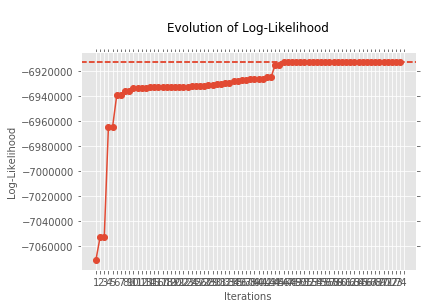

In [9]:
# Log-likelihood evolution 

plot_logLikelihood_evolution(model)


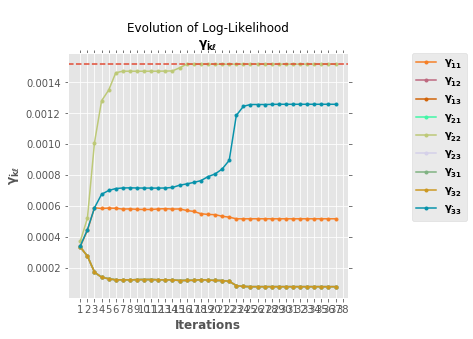

In [10]:
# Visualization of parameters evolution for poisson model
plot_gammaKK_evolution(model)


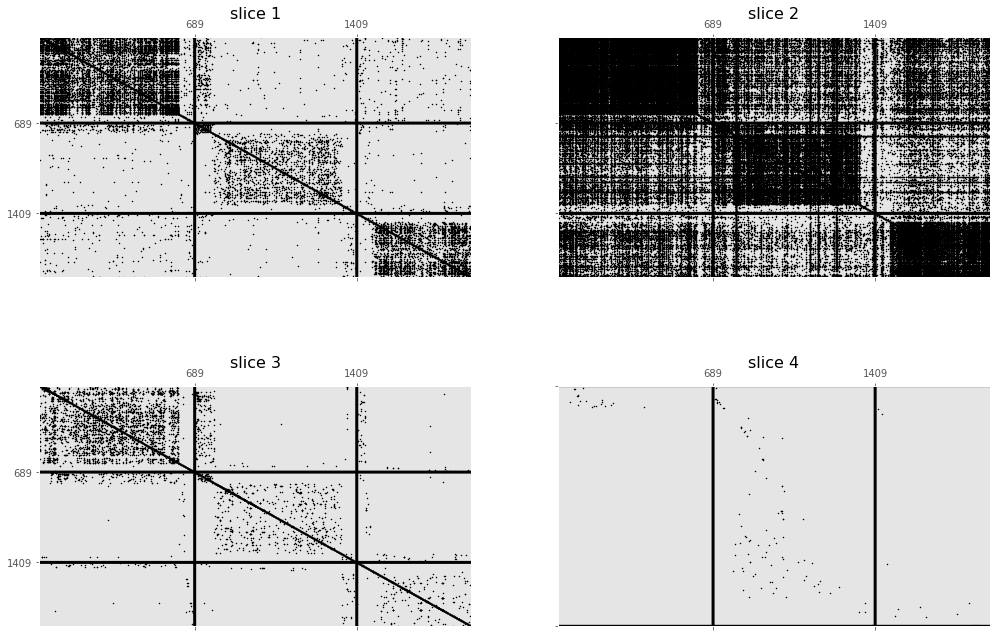

In [11]:
# Visualization of reorgnization of rows and columns for each slice
# based on obtained tensor co-clustering results 
plot_slice_reorganisation(data_v2,model)